# Import Library

In [1]:
#pip install scikit-learn

In [2]:
#pip install pdfplumber

In [3]:
#pip install textract

In [4]:
#pip install antiword

In [5]:
#pip install python-docx

In [6]:
#pip install python-doc

In [7]:
#pip install PyPDF2

In [8]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

# Extraction of Resumes from the Directory

In [9]:
os.listdir('D:\DATA_SCIENCE_COURSE\PROJECTS\PRoject-4\Resumes')

['Internship_Ravali_Musquare Technologies (1).docx',
 'Internship_Susovan Bag_Musquare Technologies.docx',
 'Peoplesoft resumes',
 'React Developer_Deepakreddy.docx',
 'React Developer_Haripriya.docx',
 'React Developer_Kamalakar Reddy.docx',
 'React Developer_Naveen sadhu.docx',
 'React Developer_PavasGoswami.doc',
 'React Developer_Pragnya.docx',
 'React Developer_Sarala Madasu-converted.docx',
 'React Developer_Thirupathiamma.docx',
 'React Developer_Vinay Reddy.doc',
 'React Dev_Krishna Kanth.docx',
 'React Dev_Krishna Kanth_Musquare Technologies.docx',
 'React JS Developer_AnjaniPriyadarshini.doc',
 'React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx',
 'React JS Developer_Venkatalakshmi (1)-converted.docx',
 'Reactjs Developer_kambala sai surendra_Musquare Technologies.docx',
 'Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx',
 'Reactjs Developer_M Lokesh.docx',
 'Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx',
 'Reactjs Developer_Prabakar

#### Peoplesoft Resumes

In [10]:
import os
import pandas as pd
from docx import Document
from win32com import client as wc

def read_docx(file_path):
    doc = Document(file_path)
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)
    return ' '.join(full_text)

def read_doc(file_path):
    word = wc.Dispatch('Word.Application')
    doc = word.Documents.Open(file_path)
    doc_text = doc.Range().Text
    word.Quit()
    return doc_text

def extract_data(directory, category):
    data = []
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if file_path.endswith('.docx'):
            text = read_docx(file_path)
        elif file_path.endswith('.doc'):
            text = read_doc(file_path)
        else:
            print(f"Unsupported file type: {file_path}")
            continue
        data.append(text)
    data1 = pd.DataFrame(data = data, columns = ['Raw_Details'])
    data1['Category1'] = category
    return data1

# Usage
directory1 = 'D:\\DATA_SCIENCE_COURSE\\PROJECTS\\PRoject-4\\Resumes\\Peoplesoft resumes'
category1 = 'PeopleSoft' 
data1 = extract_data(directory1, category1)

In [11]:
data1

,Raw_Details,Category1
0,Anubhav Kumar Singh\t\t To work in a glob...,PeopleSoft
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,PeopleSoft
2,PeopleSoft Database Administrator\r ...,PeopleSoft
3,Murali Experience Summary I have 6 years of...,PeopleSoft
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",PeopleSoft
5,PROFILE SUMMARY I have overall ...,PeopleSoft
6,PEOPLESOFT ADMINISTRATOR\r\r\rSRINIVAS.K \t\t\...,PeopleSoft
7,PeopleSoft Admin VARKALA VIKAS Career Object...,PeopleSoft
8,Vinod Akkala ...,PeopleSoft
9,PeopleSoft Admin/PeopleSoft DBA\r\rGanesh All...,PeopleSoft


#### React JS Developers Resumes

In [12]:
import os
import pandas as pd
from docx import Document
from win32com import client as wc
from PyPDF2 import PdfReader

def read_docx(file_path):
    doc = Document(file_path)
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)
    return ' '.join(full_text)

def read_doc(file_path):
    word = wc.Dispatch('Word.Application')
    doc = word.Documents.Open(file_path)
    doc_text = doc.Range().Text
    word.Quit()
    return doc_text

def read_pdf(file_path):
    pdf_reader = PdfReader(file_path)
    full_text = []
    for page in pdf_reader.pages:
        full_text.append(page.extract_text())
    return ' '.join(full_text)

def extract_data2(directory, category):
    data = []
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if file_path.endswith('.docx'):
            text = read_docx(file_path)
        elif file_path.endswith('.doc'):
            text = read_doc(file_path)
        elif file_path.endswith('.pdf'):
            text = read_pdf(file_path)
        else:
            print(f"Unsupported file type: {file_path}")
            continue
        data.append(text)
    data2 = pd.DataFrame(data = data, columns = ['Raw_Details'])
    data2['Category2'] = category
    return data2

# Usage
directory2 = 'D:\\DATA_SCIENCE_COURSE\\PROJECTS\\PRoject-4\\Resumes'  # replace with your directory path
category2 = 'React JS Developer'  # replace with your category
data2 = extract_data2(directory2, category2)

Unsupported file type: D:\DATA_SCIENCE_COURSE\PROJECTS\PRoject-4\Resumes\Peoplesoft resumes
Unsupported file type: D:\DATA_SCIENCE_COURSE\PROJECTS\PRoject-4\Resumes\SQL Developer Lightning insight
Unsupported file type: D:\DATA_SCIENCE_COURSE\PROJECTS\PRoject-4\Resumes\workday resumes


In [13]:
data2

,Raw_Details,Category2
0,Name: Ravali P ...,React JS Developer
1,SUSOVAN BAG Seeking a challenging po...,React JS Developer
2,Kanumuru Deepak Reddy CAREER OBJECTIVE: To...,React JS Developer
3,HARIPRIYA BATTINA Experience as UI Developer ...,React JS Developer
4,KAMALAKAR REDDY. A Linked In: https://www.lin...,React JS Developer
5,Naveen Sadhu Title: software developer\t\t\...,React JS Developer
6,\r\r PROFILE\rSearching for the opportunity ...,React JS Developer
7,PRAGNYA PATTNAIK Expertise: Having...,React JS Developer
8," 204,Sri geethika prestige,road number 10,b...",React JS Developer
9,\n Thirupathamma Balla SUMMARY: 2.8 year of ...,React JS Developer


#### SQL Developers Resume

In [14]:
import os
import pandas as pd
from docx import Document
from win32com import client as wc

def read_docx(file_path):
    doc = Document(file_path)
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)
    return ' '.join(full_text)

def read_doc(file_path):
    word = wc.Dispatch('Word.Application')
    doc = word.Documents.Open(file_path)
    doc_text = doc.Range().Text
    word.Quit()
    return doc_text

def extract_data3(directory, category):
    data = []
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if file_path.endswith('.docx'):
            text = read_docx(file_path)
        elif file_path.endswith('.doc'):
            text = read_doc(file_path)
        else:
            print(f"Unsupported file type: {file_path}")
            continue
        data.append(text)
    data3 = pd.DataFrame(data = data, columns = ['Raw_Details'])
    data3['Category3'] = category
    return data3

# Usage
directory3 = 'D:\DATA_SCIENCE_COURSE\PROJECTS\PRoject-4\Resumes\SQL Developer Lightning insight'
category3= 'SQL Developer' 
data3 = extract_data3(directory3, category3)

In [15]:
data3

,Raw_Details,Category3
0,ANIL KUMAR MADDUKURI \t\t SQL & MSBI Develope...,SQL Developer
1,Aradhana Tripathi Current Location: Gachibow...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4,\r\r Hyderabad\rNazeer Basha\rSQL and Power...,SQL Developer
5,Resu...,SQL Developer
6,SQL DEVELOPER Name: - Bandi prem sai Willi...,SQL Developer
7,SQL SER...,SQL Developer
8,SQL SER...,SQL Developer
9,RAJU PAVANA KUMARI Professional Summary: Ha...,SQL Developer


#### Workday Resumes

In [16]:
import os
import pandas as pd
from docx import Document
from win32com import client as wc

def read_docx(file_path):
    doc = Document(file_path)
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)
    return ' '.join(full_text)

def read_doc(file_path):
    word = wc.Dispatch('Word.Application')
    doc = word.Documents.Open(file_path)
    doc_text = doc.Range().Text
    word.Quit()
    return doc_text

def extract_data4(directory, category):
    data = []
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if file_path.endswith('.docx'):
            text = read_docx(file_path)
        elif file_path.endswith('.doc'):
            text = read_doc(file_path)
        else:
            print(f"Unsupported file type: {file_path}")
            continue
        data.append(text)
    data4 = pd.DataFrame(data = data, columns = ['Raw_Details'])
    data4['Category4'] = category
    return data4

# Usage
directory4 = 'D:\DATA_SCIENCE_COURSE\PROJECTS\PRoject-4\Resumes\workday resumes'
category4= 'Workday' 
data4 = extract_data4(directory4, category4)

In [17]:
data4

,Raw_Details,Category4
0,Chinna Subbarayudu M DOB: 06th March 1994 Nati...,Workday
1,\t Name : Gopi Krishna Reddy \t\t ...,Workday
2,Hari Krishna M\r\r\rSummary:\rA result oriente...,Workday
3,Harikrishna Akula ...,Workday
4,HIMA.MENDU\r \r\rCareer Objective\rTo continu...,Workday
5,...,Workday
6,\t\t\t\t\t\t\tName:\tJ. Sumanth Royal.\r\t\rP...,Workday
7,JYOTI VERMA\t\t\t\t\t 3 years of Experien...,Workday
8,\t\t\t\t\tMadeeswar A\r\t\r\t\rPROFILE SUMMARY...,Workday
9,Mooraboyina Guravaiah Workday Integration Sp...,Workday


## Create a DataFrame

In [18]:
resume_data = pd.concat([data1, data2, data3, data4], ignore_index = True)
resume_data = resume_data.fillna('')
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,Anubhav Kumar Singh\t\t To work in a glob...,PeopleSoft,,,
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,PeopleSoft,,,
2,PeopleSoft Database Administrator\r ...,PeopleSoft,,,
3,Murali Experience Summary I have 6 years of...,PeopleSoft,,,
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",PeopleSoft,,,
...,...,...,...,...,...
74,\tWorkday Integration Consultant\r\rName ...,,,,Workday
75,Seeking suitable positions in Workday HCM as ...,,,,Workday
76,WORKDAY | HCM | FCM Name \t\t: Kumar S.S Role...,,,,Workday
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,,,,Workday


### Merge all Unnecessary column in One Column

In [19]:
resume_data['Category'] = resume_data.apply(lambda row: row['Category1'] + row['Category2'] + row['Category3'] + row['Category4'], axis=1)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t To work in a glob...,PeopleSoft,,,,PeopleSoft
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,PeopleSoft,,,,PeopleSoft
2,PeopleSoft Database Administrator\r ...,PeopleSoft,,,,PeopleSoft
3,Murali Experience Summary I have 6 years of...,PeopleSoft,,,,PeopleSoft
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",PeopleSoft,,,,PeopleSoft
...,...,...,...,...,...,...
74,\tWorkday Integration Consultant\r\rName ...,,,,Workday,Workday
75,Seeking suitable positions in Workday HCM as ...,,,,Workday,Workday
76,WORKDAY | HCM | FCM Name \t\t: Kumar S.S Role...,,,,Workday,Workday
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,,,,Workday,Workday


In [20]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]
resume_data

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t To work in a glob...
1,PeopleSoft,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...
2,PeopleSoft,PeopleSoft Database Administrator\r ...
3,PeopleSoft,Murali Experience Summary I have 6 years of...
4,PeopleSoft,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo..."
...,...,...
74,Workday,\tWorkday Integration Consultant\r\rName ...
75,Workday,Seeking suitable positions in Workday HCM as ...
76,Workday,WORKDAY | HCM | FCM Name \t\t: Kumar S.S Role...
77,Workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...


### Final Dataset

In [21]:
resume_data.head(15)

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t To work in a glob...
1,PeopleSoft,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...
2,PeopleSoft,PeopleSoft Database Administrator\r ...
3,PeopleSoft,Murali Experience Summary I have 6 years of...
4,PeopleSoft,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo..."
5,PeopleSoft,PROFILE SUMMARY I have overall ...
6,PeopleSoft,PEOPLESOFT ADMINISTRATOR\r\r\rSRINIVAS.K \t\t\...
7,PeopleSoft,PeopleSoft Admin VARKALA VIKAS Career Object...
8,PeopleSoft,Vinod Akkala ...
9,PeopleSoft,PeopleSoft Admin/PeopleSoft DBA\r\rGanesh All...


In [22]:
resume_data["Raw_Details"][4]

'Priyanka Ramadoss\r61/46, MountPleasant, \rCoonoor\rThe Nilgiris- 643102                                                                                            \r\rCareer Objective\r\rTo excel as a software professional by working in a learning and challenging environment and utilize the skills and knowledge through diligence, dedication and ensure maximum contribution to the growth of the organization I work for.\r\rProfile Summary\r\rAn Adept IT professional with 4.11 years (September 2016 - present) of experience as Peoplesoft Admin with Accenture\r\rProfessional Summary\r\rPeopleSoft Administrator (September 2016-Present)\r\rExperience in PeopleSoft Administration for Finance application.\rProficient in creating and configuring PeopleSoft components like Web server, Application server and process schedulers.\rActive monitoring in Non production databases and applications.\rKnowledgeable on PeopleSoft migrations using application designer, data mover and taking compare reports 

### Save new CSV File

In [23]:
resume_data.to_csv('Raw_Resume.csv', index=False)

## EDA & Data Understanding

In [24]:
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t To work in a glob...
1,PeopleSoft,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...
2,PeopleSoft,PeopleSoft Database Administrator\r ...
3,PeopleSoft,Murali Experience Summary I have 6 years of...
4,PeopleSoft,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo..."
...,...,...
74,Workday,\tWorkday Integration Consultant\r\rName ...
75,Workday,Seeking suitable positions in Workday HCM as ...
76,Workday,WORKDAY | HCM | FCM Name \t\t: Kumar S.S Role...
77,Workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...


In [25]:
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

## Number of Words in each Resume

In [26]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Anubhav Kumar Singh\t\t To work in a glob...,1119
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,1431
2,PeopleSoft Database Administrator\r ...,1346
3,Murali Experience Summary I have 6 years of...,607
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",670


### Number of Characters

In [27]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Anubhav Kumar Singh\t\t To work in a glob...,7256
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,8047
2,PeopleSoft Database Administrator\r ...,6768
3,Murali Experience Summary I have 6 years of...,3981
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",5076


### Number of Stopwords

In [28]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

,Raw_Details,Stopwords
0,Anubhav Kumar Singh\t\t To work in a glob...,187
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,186
2,PeopleSoft Database Administrator\r ...,177
3,Murali Experience Summary I have 6 years of...,111
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",123


### Number of Numerics

In [29]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Anubhav Kumar Singh\t\t To work in a glob...,3
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,6
2,PeopleSoft Database Administrator\r ...,4
3,Murali Experience Summary I have 6 years of...,1
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",5


In [30]:
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,Anubhav Kumar Singh\t\t To work in a glob...,1119,7256,187,3
1,PeopleSoft,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,1431,8047,186,6
2,PeopleSoft,PeopleSoft Database Administrator\r ...,1346,6768,177,4
3,PeopleSoft,Murali Experience Summary I have 6 years of...,607,3981,111,1
4,PeopleSoft,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",670,5076,123,5
...,...,...,...,...,...,...
74,Workday,\tWorkday Integration Consultant\r\rName ...,904,6967,197,3
75,Workday,Seeking suitable positions in Workday HCM as ...,1064,6324,191,6
76,Workday,WORKDAY | HCM | FCM Name \t\t: Kumar S.S Role...,1124,7309,228,1
77,Workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,1027,6627,193,7


## Text Pre-Processing

### Using Regular Expression

In [31]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [32]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

### Clean Text from Resume

In [33]:
resume_data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t To work in a glob...,anubhav kumar singh work globally competitive ...
1,PeopleSoft,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,profile summary years experience implementing ...
2,PeopleSoft,PeopleSoft Database Administrator\r ...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,Murali Experience Summary I have 6 years of...,murali experience summary years experience wor...
4,PeopleSoft,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...
74,Workday,\tWorkday Integration Consultant\r\rName ...,workday integration consultant name sri krishn...
75,Workday,Seeking suitable positions in Workday HCM as ...,seeking suitable positions workday hcm techno ...
76,Workday,WORKDAY | HCM | FCM Name \t\t: Kumar S.S Role...,workday hcm fcm name kumar role workday consul...
77,Workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,venkateswarlu workday consultant years experie...


## Save the Clean Data in new CSV File

In [34]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh work globally competitive ...
1,PeopleSoft,profile summary years experience implementing ...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,murali experience summary years experience wor...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,seeking suitable positions workday hcm techno ...
76,Workday,workday hcm fcm name kumar role workday consul...
77,Workday,venkateswarlu workday consultant years experie...


In [35]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [36]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh work globally competitive ...
1,PeopleSoft,profile summary years experience implementing ...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,murali experience summary years experience wor...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,seeking suitable positions workday hcm techno ...
76,Workday,workday hcm fcm name kumar role workday consul...
77,Workday,venkateswarlu workday consultant years experie...


In [37]:
resume_data.Resume_Details[5]

'profile summary overall years experience peoplesoft administrator installed peopletools scratch including products experience peopletools application hrms fscm deterministic approach towards problem solving troubleshooting proficient integration broker upgraded fscm hcm applications peopletools peopletools education graduated tech electronics communication engg college engineering vizianagaram jntuk aggregate achieved marks standard scored standard achievements awarded bravo pat back techahindra awarded associate month award innovator month time awarded spot pat back capgemini work experience capgemini may till production support finance environment respective non production environments project experience project name axa role consultant environment windows server cognizant technol ogy sol ions augus april voya financial insurance client project deals support managing finance applications project experience project name voya financials role associate environment windows server tech m

### Tokenization

In [38]:
import nltk
nltk.download('punkt')
resume_data['Tokenized_Resumes'] = resume_data['Resume_Details'].apply(lambda x: nltk.word_tokenize(x))
resume_data.head(10)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tirum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Category,Resume_Details,Tokenized_Resumes
0,PeopleSoft,anubhav kumar singh work globally competitive ...,"[anubhav, kumar, singh, work, globally, compet..."
1,PeopleSoft,profile summary years experience implementing ...,"[profile, summary, years, experience, implemen..."
2,PeopleSoft,peoplesoft database administrator gangareddy p...,"[peoplesoft, database, administrator, gangared..."
3,PeopleSoft,murali experience summary years experience wor...,"[murali, experience, summary, years, experienc..."
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...,"[priyanka, ramadoss, mountpleasant, coonoor, n..."
5,PeopleSoft,profile summary overall years experience peopl...,"[profile, summary, overall, years, experience,..."
6,PeopleSoft,peoplesoft administrator srinivas experience s...,"[peoplesoft, administrator, srinivas, experien..."
7,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,"[peoplesoft, admin, varkala, vikas, career, ob..."
8,PeopleSoft,vinod akkala peoplesoft dba admin professional...,"[vinod, akkala, peoplesoft, dba, admin, profes..."
9,PeopleSoft,peoplesoft admin peoplesoft dba ganesh alladi ...,"[peoplesoft, admin, peoplesoft, dba, ganesh, a..."


In [39]:
resume_data.drop(['Tokenized_Resumes'],axis=1,inplace=True)

### Stopwords removal

In [40]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

cleaned_resumes = []

for index, row in resume_data.iterrows():

    words_without_stopwords = [word for word in row.Resume_Details.split()]

    cleaned_resumes.append(' '.join(words_without_stopwords))

resume_data['Final_Clean_Resumes'] = cleaned_resumes
resume_data.head(10)

,Category,Resume_Details,Final_Clean_Resumes
0,PeopleSoft,anubhav kumar singh work globally competitive ...,anubhav kumar singh work globally competitive ...
1,PeopleSoft,profile summary years experience implementing ...,profile summary years experience implementing ...
2,PeopleSoft,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,murali experience summary years experience wor...,murali experience summary years experience wor...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...,priyanka ramadoss mountpleasant coonoor nilgir...
5,PeopleSoft,profile summary overall years experience peopl...,profile summary overall years experience peopl...
6,PeopleSoft,peoplesoft administrator srinivas experience s...,peoplesoft administrator srinivas experience s...
7,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,peoplesoft admin varkala vikas career objectiv...
8,PeopleSoft,vinod akkala peoplesoft dba admin professional...,vinod akkala peoplesoft dba admin professional...
9,PeopleSoft,peoplesoft admin peoplesoft dba ganesh alladi ...,peoplesoft admin peoplesoft dba ganesh alladi ...


In [41]:
Tokenized_Resume = resume_data['Final_Clean_Resumes'].apply(lambda x: x.split())
Tokenized_Resume.head(10)

0    [anubhav, kumar, singh, work, globally, compet...
1    [profile, summary, years, experience, implemen...
2    [peoplesoft, database, administrator, gangared...
3    [murali, experience, summary, years, experienc...
4    [priyanka, ramadoss, mountpleasant, coonoor, n...
5    [profile, summary, overall, years, experience,...
6    [peoplesoft, administrator, srinivas, experien...
7    [peoplesoft, admin, varkala, vikas, career, ob...
8    [vinod, akkala, peoplesoft, dba, admin, profes...
9    [peoplesoft, admin, peoplesoft, dba, ganesh, a...
Name: Final_Clean_Resumes, dtype: object

### Lemmatization

In [42]:
import nltk
nltk.download('wordnet')
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

Tokenized_Resumes = Tokenized_Resume.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
Tokenized_Resumes.head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tirum\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tirum\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    [anubhav, kumar, singh, work, globally, compet...
1    [profile, summary, year, experience, implement...
2    [peoplesoft, database, administrator, gangared...
3    [murali, experience, summary, year, experience...
4    [priyanka, ramadoss, mountpleasant, coonoor, n...
5    [profile, summary, overall, year, experience, ...
6    [peoplesoft, administrator, srinivas, experien...
7    [peoplesoft, admin, varkala, vikas, career, ob...
8    [vinod, akkala, peoplesoft, dba, admin, profes...
9    [peoplesoft, admin, peoplesoft, dba, ganesh, a...
Name: Final_Clean_Resumes, dtype: object

In [43]:
for i, tokens in enumerate(Tokenized_Resume):
    Tokenized_Resume[i] = ' '.join(tokens)

resume_data['Final_Clean_Resumes'] = Tokenized_Resume
resume_data.head(10)

,Category,Resume_Details,Final_Clean_Resumes
0,PeopleSoft,anubhav kumar singh work globally competitive ...,anubhav kumar singh work globally competitive ...
1,PeopleSoft,profile summary years experience implementing ...,profile summary years experience implementing ...
2,PeopleSoft,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,murali experience summary years experience wor...,murali experience summary years experience wor...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...,priyanka ramadoss mountpleasant coonoor nilgir...
5,PeopleSoft,profile summary overall years experience peopl...,profile summary overall years experience peopl...
6,PeopleSoft,peoplesoft administrator srinivas experience s...,peoplesoft administrator srinivas experience s...
7,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,peoplesoft admin varkala vikas career objectiv...
8,PeopleSoft,vinod akkala peoplesoft dba admin professional...,vinod akkala peoplesoft dba admin professional...
9,PeopleSoft,peoplesoft admin peoplesoft dba ganesh alladi ...,peoplesoft admin peoplesoft dba ganesh alladi ...


## Named Entity Recognition (NER)

In [44]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Final_Clean_Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 575), ('peoplesoft', 440), ('application', 396), ('workday', 392), ('using', 383), ('server', 338), ('reports', 320), ('data', 319), ('project', 310), ('business', 264), ('sql', 244), ('process', 233), ('database', 230), ('web', 229), ('worked', 219), ('knowledge', 209), ('involved', 188), ('integrations', 187), ('client', 186), ('like', 179), ('integration', 177), ('support', 175), ('system', 172), ('tools', 172), ('hcm', 166), ('development', 165), ('good', 164), ('creating', 161), ('team', 159), ('working', 157), ('design', 152), ('skills', 151), ('technical', 151), ('people', 150), ('servers', 149), ('testing', 149), ('report', 146), ('created', 145), ('various', 144), ('responsibilities', 143), ('services', 139), ('environment', 135), ('production', 133), ('react', 132), ('issues', 131), ('oracle', 129), ('role', 127), ('management', 127), ('security', 126), ('eib', 125)]


## Parts Of Speech (POS) Tagging

In [45]:
#!python -m spacy download en_core_web_lg

In [46]:
#nlp = spacy.load('en_core_web_lg')

#one_block = cleanedSentences[1300:5200]
#doc_block = nlp(one_block)
#spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

#### Count Vectoriser

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
review_cv=cv.fit_transform(resume_data["Final_Clean_Resumes"])

In [48]:
print(cv.get_feature_names_out()[100:2000])

['agility' 'aging' 'agk' ... 'jdk' 'jenkins' 'jigyasa']


In [49]:
print(review_cv.toarray().shape)

(79, 4264)


In [50]:
resume_data

,Category,Resume_Details,Final_Clean_Resumes
0,PeopleSoft,anubhav kumar singh work globally competitive ...,anubhav kumar singh work globally competitive ...
1,PeopleSoft,profile summary years experience implementing ...,profile summary years experience implementing ...
2,PeopleSoft,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,murali experience summary years experience wor...,murali experience summary years experience wor...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...
74,Workday,workday integration consultant name sri krishn...,workday integration consultant name sri krishn...
75,Workday,seeking suitable positions workday hcm techno ...,seeking suitable positions workday hcm techno ...
76,Workday,workday hcm fcm name kumar role workday consul...,workday hcm fcm name kumar role workday consul...
77,Workday,venkateswarlu workday consultant years experie...,venkateswarlu workday consultant years experie...


In [51]:
resume_data.drop(['Resume_Details'],axis=1,inplace=True)
resume_data

,Category,Final_Clean_Resumes
0,PeopleSoft,anubhav kumar singh work globally competitive ...
1,PeopleSoft,profile summary years experience implementing ...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,murali experience summary years experience wor...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,seeking suitable positions workday hcm techno ...
76,Workday,workday hcm fcm name kumar role workday consul...
77,Workday,venkateswarlu workday consultant years experie...


In [52]:
resume_data.Category.value_counts()

React JS Developer    24
Workday               21
PeopleSoft            20
SQL Developer         14
Name: Category, dtype: int64

#### Resume Categories

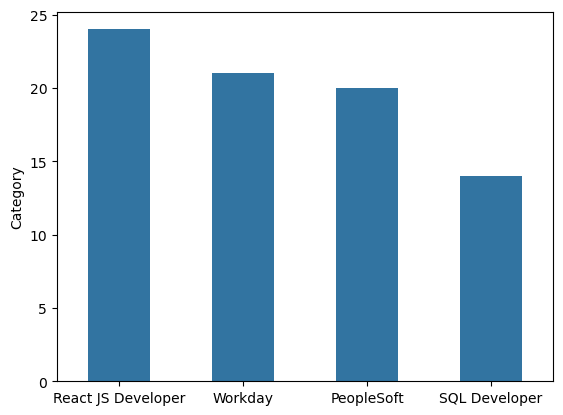

In [53]:
category_counts = resume_data['Category'].value_counts()

ax = sns.barplot(x=list(category_counts.index),y=category_counts,width=0.5)

# N-grams

#### N-grams analyses are often used to see which words often show up together.

In [54]:
#pip install textblob

In [55]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tirum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
TextBlob(resume_data['Final_Clean_Resumes'][1]).ngrams(2)[:20]

[WordList(['profile', 'summary']),
 WordList(['summary', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'implementing']),
 WordList(['implementing', 'upgrading']),
 WordList(['upgrading', 'supporting']),
 WordList(['supporting', 'peoplesoft']),
 WordList(['peoplesoft', 'database']),
 WordList(['database', 'administration']),
 WordList(['administration', 'including']),
 WordList(['including', 'human']),
 WordList(['human', 'capital']),
 WordList(['capital', 'management']),
 WordList(['management', 'hcm']),
 WordList(['hcm', 'financials']),
 WordList(['financials', 'campus']),
 WordList(['campus', 'solutions']),
 WordList(['solutions', 'portal']),
 WordList(['portal', 'ihub']),
 WordList(['ihub', 'expertise'])]

### Using the Word Clowds

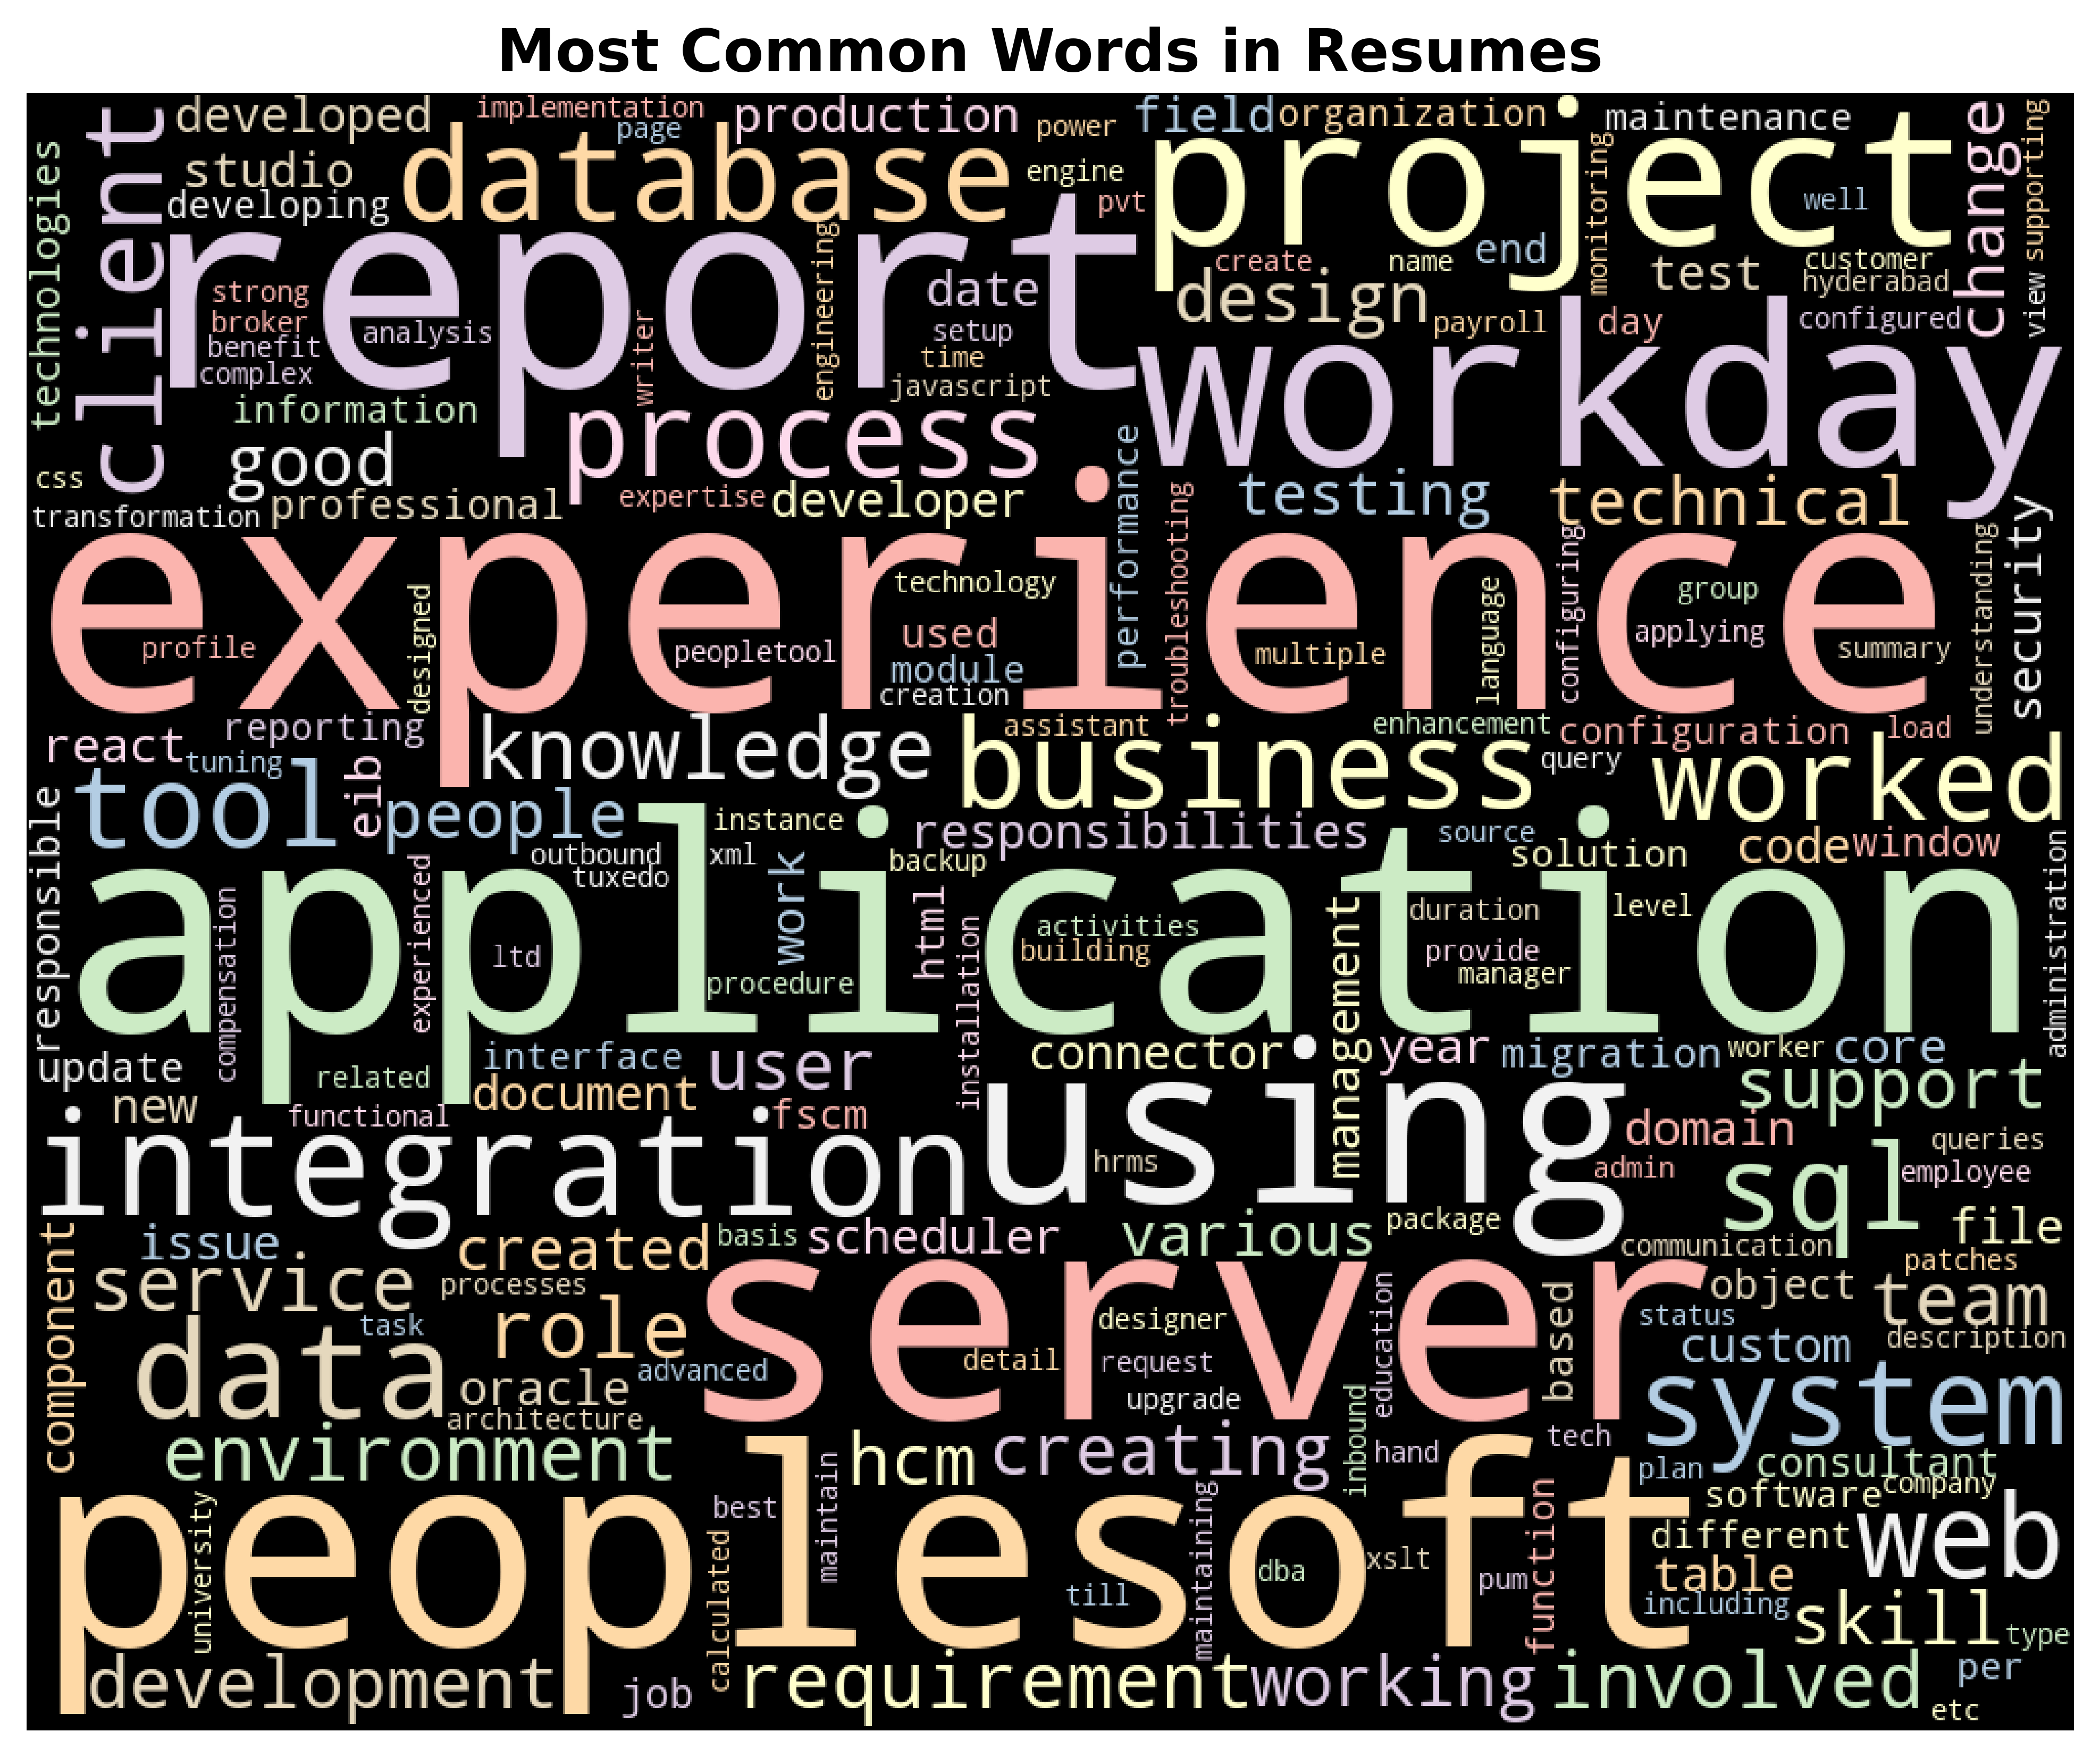

In [57]:
text = " ".join(cat for cat in resume_data.Final_Clean_Resumes) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [157]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer(stop_words='english', max_features=100)

categories = ['React JS Developer', 'Workday', 'PeopleSoft', 'SQL Developer']

# Initialize an empty DataFrame to store the results
results = pd.DataFrame(columns=['Category', 'Word', 'Frequency'])

for category in categories:
    # Filter the data for the current category
    category_data = resume_data[resume_data['Category'] == category]['Final_Clean_Resumes']
    
    # Learn the vocabulary dictionary and return term-document matrix
    X = vectorizer.fit_transform(category_data)
    
    # Sum up the counts of each vocabulary word
    word_counts = X.sum(axis=0)
    
    # Map the column index to the word
    words_freq = [(word, word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    
    # Sort the words_freq list by the count
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    for word, freq in words_freq[:20]:
        results = results.append({'Category': category, 'Word': word, 'Frequency': freq}, ignore_index=True)
        
print(results)

              Category        Word Frequency
0   React JS Developer       react       132
1   React JS Developer  experience        89
2   React JS Developer        html        84
3   React JS Developer       using        80
4   React JS Developer     project        75
..                 ...         ...       ...
75       SQL Developer      stored        36
76       SQL Developer       views        35
77       SQL Developer       power        34
78       SQL Developer        like        33
79       SQL Developer    services        33

[80 rows x 3 columns]


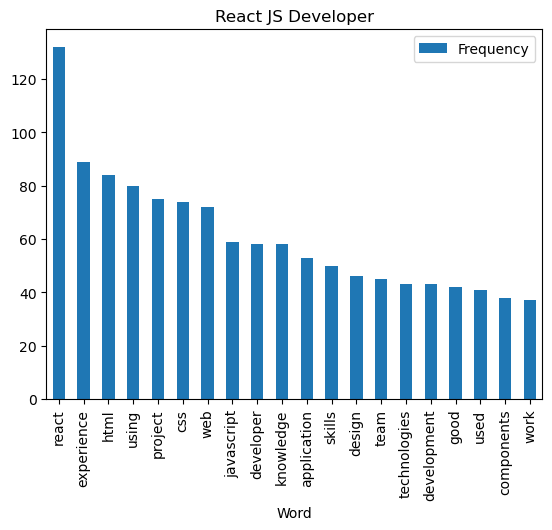

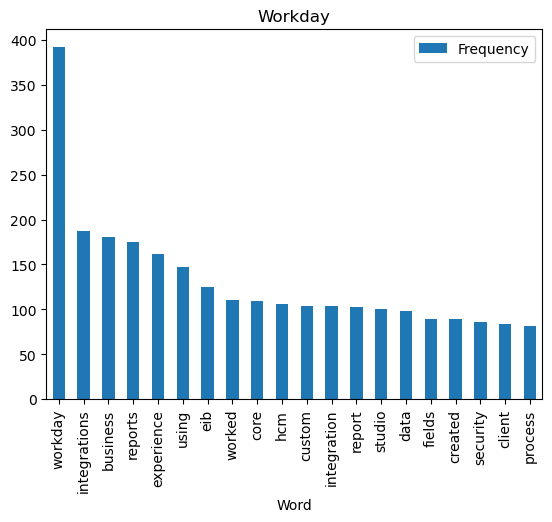

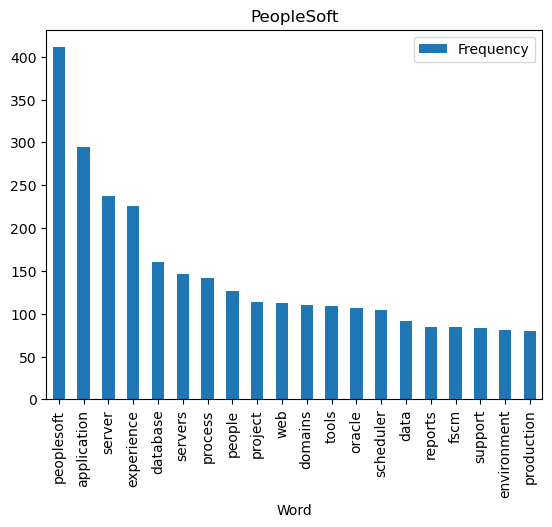

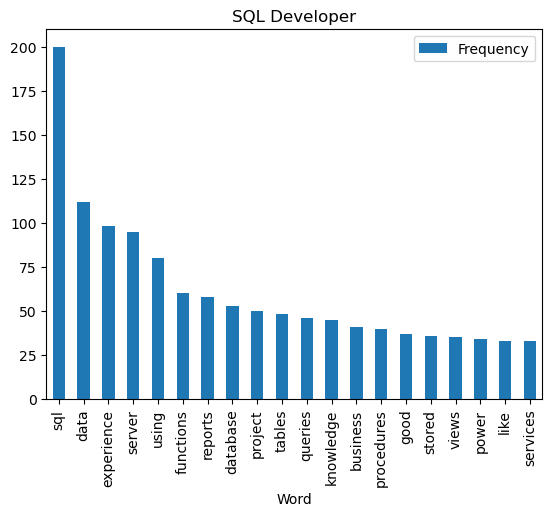

In [158]:
# Plot the top 10 frequency words for each category
for category in categories:
    df = results[results['Category'] == category]
    df.plot(kind='bar', x='Word', y='Frequency', title=category)
    plt.show()

In [159]:
# Save the DataFrame to a CSV file
results = results.drop(columns = 'Frequency')
results.to_csv('skills_df.csv', index=False)

### Split data for training and testing

In [64]:
# Shuffle the DataFrame rows
resume_data = resume_data.sample(frac=1).reset_index(drop=True)

In [71]:
resume_data

,Category,Final_Clean_Resumes
0,Workday,vinay kumar workday functional consultant expe...
1,React JS Developer,haripriya battina experience developer reactjs...
2,Workday,workday integration consultant name sri krishn...
3,Workday,himaja career objective work towards achieving...
4,PeopleSoft,profile summary years experience implementing ...
...,...,...
74,React JS Developer,ranga gaganam years successful experience phas...
75,React JS Developer,mareedu lokesh babu professional overview arou...
76,React JS Developer,venkatalakshmi pedireddy software developer ex...
77,PeopleSoft,profile summary overall years experience peopl...


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
requiredText = resume_data['Final_Clean_Resumes'].values
requiredTarget = resume_data['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=45, test_size=0.20,stratify=requiredTarget)
X_train.shape, X_test.shape

((63, 4175), (16, 4175))

# Model Building

## Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)

predict1 = lg.predict(X_test)

In [75]:
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score
accuracy_1 = accuracy_score(y_test,predict1)
accuracy_1

0.875

In [76]:
cm = confusion_matrix(y_test,predict1)
cm

array([[3, 1, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 2, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

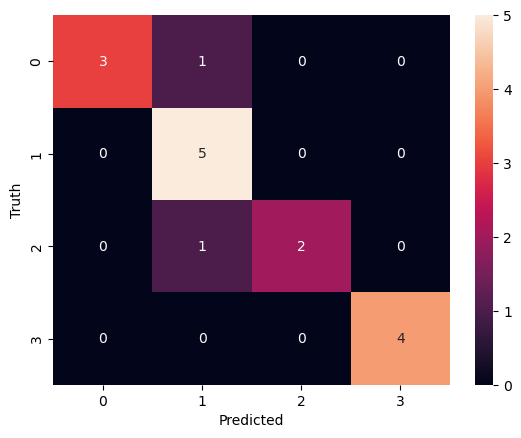

In [77]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict1))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.75      0.86         4
React JS Developer       0.71      1.00      0.83         5
     SQL Developer       1.00      0.67      0.80         3
           Workday       1.00      1.00      1.00         4

          accuracy                           0.88        16
         macro avg       0.93      0.85      0.87        16
      weighted avg       0.91      0.88      0.87        16



In [79]:
accuracy_1 = round(accuracy_score(y_test,predict1),4)
precision_1 = round(precision_score(y_test,predict1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,predict1, average = 'macro'),4)
f1_1 = round(f1_score(y_test,predict1, average = 'macro'),4)

In [80]:
print('Accuracy Score  : ', accuracy_1)
print('Precision Score : ', precision_1)
print('Recall Score    : ', recall_1)
print('f1-Score        : ', f1_1)

Accuracy Score  :  0.875
Precision Score :  0.9286
Recall Score    :  0.8542
f1-Score        :  0.8726


## Naive-Bayes Classifier

In [81]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)
predict2=nb.predict(X_test)

In [82]:
accuracy_2 = accuracy_score(y_test,predict2)
accuracy_2

0.8125

In [83]:
cm2=confusion_matrix(y_test,predict2)
cm2

array([[2, 0, 0, 2],
       [0, 5, 0, 0],
       [0, 1, 2, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

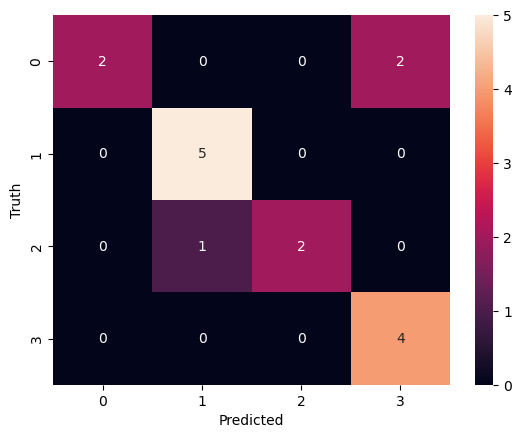

In [84]:
sns.heatmap(cm2,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [85]:
print(classification_report(y_test,predict2))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.50      0.67         4
React JS Developer       0.83      1.00      0.91         5
     SQL Developer       1.00      0.67      0.80         3
           Workday       0.67      1.00      0.80         4

          accuracy                           0.81        16
         macro avg       0.88      0.79      0.79        16
      weighted avg       0.86      0.81      0.80        16



In [86]:
accuracy_2 = round(accuracy_score(y_test,predict2),4)
precision_2 = round(precision_score(y_test,predict2,average = 'macro'),4)
recall_2 = round(recall_score(y_test,predict2, average = 'macro'),4)
f1_2 = round(f1_score(y_test,predict2, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_2)
print('Precision Score : ', precision_2)
print('Recall Score    : ', recall_2)
print('f1-Score        : ', f1_2)

Accuracy Score  :  0.8125
Precision Score :  0.875
Recall Score    :  0.7917
f1-Score        :  0.7939


## Decision Tree Classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
predict3=dt.predict(X_test)

In [88]:
accuracy_3 = accuracy_score(y_test,predict3)
accuracy_3

1.0

In [89]:
cm3=confusion_matrix(y_test,predict3)
cm3

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

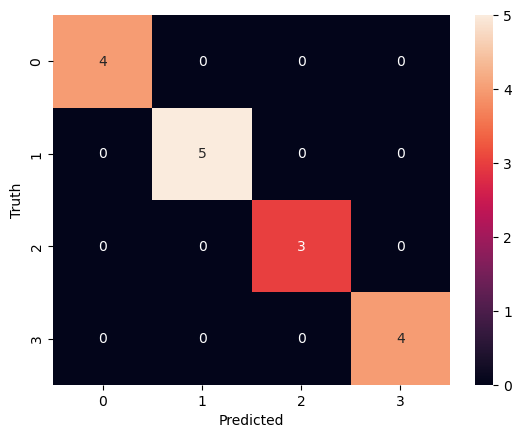

In [90]:
sns.heatmap(cm3,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [91]:
print(classification_report(y_test,predict3))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         4
React JS Developer       1.00      1.00      1.00         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         4

          accuracy                           1.00        16
         macro avg       1.00      1.00      1.00        16
      weighted avg       1.00      1.00      1.00        16



In [92]:
accuracy_3 = round(accuracy_score(y_test,predict3),4)
precision_3 = round(precision_score(y_test,predict3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,predict3, average = 'macro'),4)
f1_3 = round(f1_score(y_test,predict3, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


## Support Vector Machine Classifier

In [93]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)
predict4 = sv.predict(X_test)

In [94]:
accuracy_4 = accuracy_score(y_test,predict4)
accuracy_4

0.8125

In [95]:
cm4 = confusion_matrix(y_test,predict4)
cm4

array([[2, 2, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 2, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

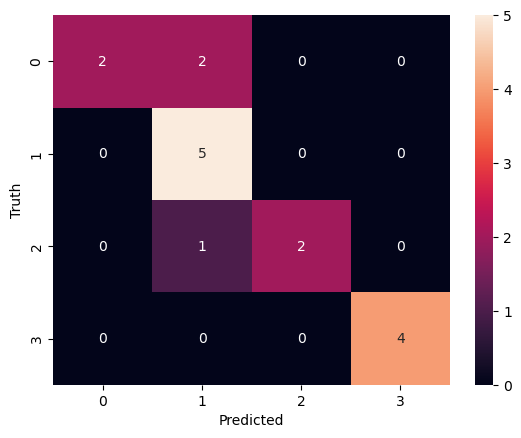

In [96]:
sns.heatmap(cm4,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [97]:
print(classification_report(y_test,predict4))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.50      0.67         4
React JS Developer       0.62      1.00      0.77         5
     SQL Developer       1.00      0.67      0.80         3
           Workday       1.00      1.00      1.00         4

          accuracy                           0.81        16
         macro avg       0.91      0.79      0.81        16
      weighted avg       0.88      0.81      0.81        16



In [98]:
accuracy_4 = round(accuracy_score(y_test,predict4),4)
precision_4 = round(precision_score(y_test,predict4,average = 'macro'),4)
recall_4 = round(recall_score(y_test,predict4, average = 'macro'),4)
f1_4 = round(f1_score(y_test,predict4, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)


Accuracy Score  :  0.8125
Precision Score :  0.9062
Recall Score    :  0.7917
f1-Score        :  0.809


## Random forest Classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predict5=rf.predict(X_test)

In [100]:
accuracy_5 = accuracy_score(y_test,predict5)
accuracy_5

1.0

In [101]:
cm5=confusion_matrix(y_test,predict5)
cm5

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

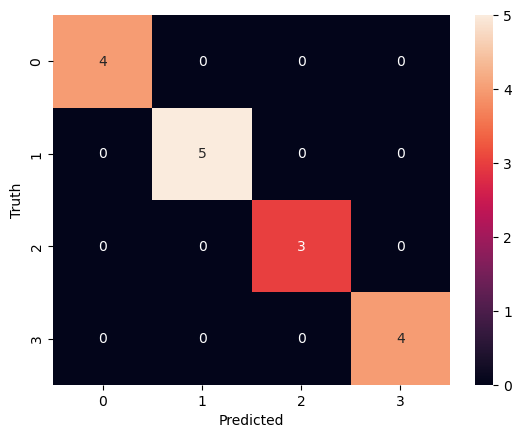

In [102]:
sns.heatmap(cm5,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [103]:
print(classification_report(y_test,predict5))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         4
React JS Developer       1.00      1.00      1.00         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         4

          accuracy                           1.00        16
         macro avg       1.00      1.00      1.00        16
      weighted avg       1.00      1.00      1.00        16



In [104]:
accuracy_5 = round(accuracy_score(y_test,predict5),4)
precision_5 = round(precision_score(y_test,predict5,average = 'macro'),4)
recall_5 = round(recall_score(y_test,predict5, average = 'macro'),4)
f1_5 = round(f1_score(y_test,predict5, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


## AdaBoost classifier

In [105]:
#!pip install lightgbm

In [106]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [107]:
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
predict6=ab.predict(X_test)

In [108]:
accuracy_6 = accuracy_score(y_test,predict6)
accuracy_6

0.875

In [109]:
cm6 = confusion_matrix(y_test,predict6)
cm6

array([[3, 1, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 2, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

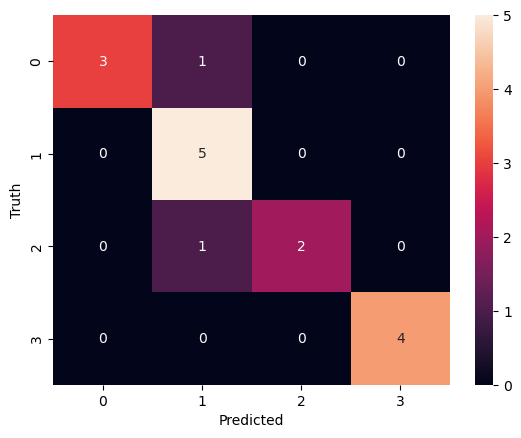

In [110]:
sns.heatmap(cm6,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [111]:
print(classification_report(y_test,predict6))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.75      0.86         4
React JS Developer       0.71      1.00      0.83         5
     SQL Developer       1.00      0.67      0.80         3
           Workday       1.00      1.00      1.00         4

          accuracy                           0.88        16
         macro avg       0.93      0.85      0.87        16
      weighted avg       0.91      0.88      0.87        16



In [112]:
accuracy_6 = round(accuracy_score(y_test,predict6),4)
precision_6 = round(precision_score(y_test,predict6,average = 'macro'),4)
recall_6 = round(recall_score(y_test,predict6, average = 'macro'),4)
f1_6 = round(f1_score(y_test,predict6, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_6)

Accuracy Score  :  0.875
Precision Score :  0.9286
Recall Score    :  0.8542
f1-Score        :  0.8726


## Gradient Boosting

In [113]:
gd = GradientBoostingClassifier()
gd.fit(X_train,y_train)
predict7 = gd.predict(X_test)

In [114]:
accuracy_7 = accuracy_score(y_test,predict7)
accuracy_7

0.9375

In [115]:
cm7 = confusion_matrix(y_test,predict7)
cm7

array([[3, 1, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

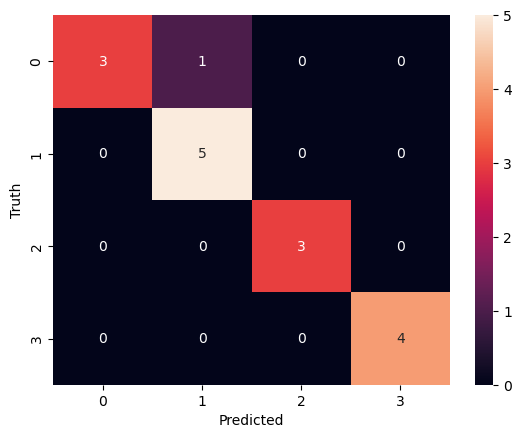

In [116]:
sns.heatmap(cm7,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [117]:
print(classification_report(y_test,predict7))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.75      0.86         4
React JS Developer       0.83      1.00      0.91         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         4

          accuracy                           0.94        16
         macro avg       0.96      0.94      0.94        16
      weighted avg       0.95      0.94      0.94        16



In [118]:
accuracy_7 = round(accuracy_score(y_test,predict7),4)
precision_7 = round(precision_score(y_test,predict7,average = 'macro'),4)
recall_7 = round(recall_score(y_test,predict7, average = 'macro'),4)
f1_7 = round(f1_score(y_test,predict7, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_7)
print('Precision Score : ', precision_7)
print('Recall Score    : ', recall_7)
print('f1-Score        : ', f1_7)

Accuracy Score  :  0.9375
Precision Score :  0.9583
Recall Score    :  0.9375
f1-Score        :  0.9416


In [122]:
table = {'Classifier' : ['Logistic Regression','Naive-Bayes Classifier','Decision Tree Classifier','SVC Classifier','Random tree classifier','AdaBoost Classifier', 'Gradient Boosting Classifier'], 'Accuracy' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7], 'Precision Score' : [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7], 'Recall Score' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7], 'F1_Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7]}
table = pd.DataFrame(table)
table.sort_values(["Accuracy"],inplace = True, ignore_index=True)
table

,Classifier,Accuracy,Precision Score,Recall Score,F1_Score
0,Naive-Bayes Classifier,0.8125,0.8750,0.7917,0.7939
1,SVC Classifier,0.8125,0.9062,0.7917,0.8090
2,Logistic Regression,0.8750,0.9286,0.8542,0.8726
3,AdaBoost Classifier,0.8750,0.9286,0.8542,0.8726
4,Gradient Boosting Classifier,0.9375,0.9583,0.9375,0.9416
5,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000
6,Random tree classifier,1.0000,1.0000,1.0000,1.0000


In [120]:
import pickle
filename = 'RF_model.pkl'
pickle.dump(rf,open(filename,'wb'))

In [121]:
filename = 'vector.pkl'
pickle.dump(word_vectorizer,open(filename,'wb'))